In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt 
import netCDF4 as nc
from netCDF4 import Dataset
import pyproj


In [9]:
#importing coral reef data

gml_file_coral_reefs = "/Users/maikentomren/Documents/prosjektoppgave/plotting_first_tries/KystOgFiskeri_50_Trondelag_25832_Korallrev_GML.gml"
gdf_coral_reefs = gpd.read_file(gml_file_coral_reefs)
coral_data = gdf_coral_reefs[gdf_coral_reefs['naturtypeNavn'] == 'Korallforekomster']
coral_positions = coral_data[['lengdegrad', 'breddegrad', 'gml_id']]
coral_lons = coral_data['lengdegrad'].values
coral_lats = coral_data['breddegrad'].values



In [10]:
#importing sea pen data

gml_file_sea_pen = "/Users/maikentomren/Documents/prosjektoppgave/plotting_first_tries/Natur_0000_Norge_25833_SarbareMarineBunndyrObs_GML.gml"
gdf_sea_pen = gpd.read_file(gml_file_sea_pen)
seapen_positions = gdf_sea_pen[['lengdegrad', 'breddegrad', 'gml_id']]
seapen_lons = seapen_positions['lengdegrad'].values 
seapen_lats = seapen_positions['breddegrad'].values


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyogrio/geopandas.py:261: UserWarning: More than one layer found in 'Natur_0000_Norge_25833_SarbareMarineBunndyrObs_GML.gml': 'Blomkålkorallskog' (default), 'Bløtbunnskorallskog', 'Glassvampsamfunn', 'Hardbunnskorallskog', 'Sjøfjærbunn', 'Svampskog', 'Svampspikelbunn', 'Umbellulabestander'. Specify layer parameter to avoid this warning.
  result = read_func(


In [11]:
#importing SINMOD data 
filename_sinmod = 'dataset.nc'
sinmod_data = Dataset(filename_sinmod, 'r')


grid_lons = sinmod_data.variables['gridLons'][:]
grid_lats = sinmod_data.variables['gridLats'][:]
u_velocity = sinmod_data.variables['u-velocity'][0, 0, :, :]  
v_velocity = sinmod_data.variables['v-velocity'][0, 0, :, :]  
depth = sinmod_data.variables['depth'][:]  
field_u = sinmod_data.variables['u-velocity'][0, 0, :, :]  # Example: first time slice and depth level
field_v = sinmod_data.variables['v-velocity'][0, 0, :, :]  # Example: first time slice and depth level


In [13]:
#specifying projection to SINMOD format

#grid mapping info in SINMOD file
grid_mapping = sinmod_data.variables['grid_mapping']  
print(grid_mapping)

from pyproj import CRS, Transformer

# Define the Coordinate Reference Systems (CRS)
crs_wgs84 = CRS.from_epsg(4326)  # WGS84 (lat/lon coordinates)
crs_euref89_utm32 = CRS.from_epsg(25832)  # EUREF89 / UTM zone 32N
crs_euref89 = CRS.from_epsg(4258)  # EUREF89 (geographic lat/lon)

# SINMOD projection parameters as a custom projection
crs_sinmod = CRS.from_proj4("+proj=stere +lat_0=90 +lat_ts=60 +lon_0=58 "
                            "+x_0=2226000 +y_0=1916000 +ellps=WGS84 +units=m +no_defs")

# Create a transformer to transform from WGS84 to SINMOD
transformer_wgs84_to_sinmod = Transformer.from_crs(crs_wgs84, crs_sinmod, always_xy=True)

# Create a transformer to transform from EUREF89 (geographic) to SINMOD
transformer_euref89_to_sinmod = Transformer.from_crs(crs_euref89, crs_sinmod, always_xy=True)

# Performing projection on coral reef data

print("coral_lons range before:", coral_lons.min(), coral_lons.max())
print("coral_lats range before:", coral_lats.min(), coral_lats.max())
print("--------------------------------")
print("sinmod_lons range:", grid_lons.min(), grid_lons.max())
print("sinmod_lats range:", grid_lats.min(), grid_lats.max())
print("--------------------------------")

# Transform coral coordinates from EUREF89 to SINMOD
coral_x, coral_y = transformer_euref89_to_sinmod.transform(coral_lons, coral_lats)
coral_x /= 800
coral_y /= 800
print("coral_lons range after:", coral_x.min(), coral_x.max())
print("coral_lats range after:", coral_y.min(), coral_y.max())

#Performing projection on sea pen data

print("seapenl_lons range before:", seapen_lons.min(), seapen_lons.max())
print("seapen_lats range before:", seapen_lats.min(), seapen_lats.max())
print("--------------------------------")
print("sinmod_lons range:", grid_lons.min(), grid_lons.max())
print("sinmod_lats range:", grid_lats.min(), grid_lats.max())
print("--------------------------------")

# Transform seapen coordinates from EUREF89 to SINMOD
seapen_x, seapen_y = transformer_euref89_to_sinmod.transform(seapen_lons, seapen_lats)
seapen_x /= 800
seapen_y /= 800
print("seapen_lons range after:", seapen_x.min(), seapen_x.max())
print("seapen_lats range after:", seapen_y.min(), seapen_y.max())


<class 'netCDF4._netCDF4.Variable'>
int32 grid_mapping()
    straight_vertical_longitude_from_pole: 58.0
    horizontal_resolution: 800.0
    latitude_of_projection_origin: 90.0
    longitude_of_projection_origin: 58.0
    standard_parallel: 60.0
    origoRef: [0. 0.]
    false_easting: 2226000.0
    false_northing: 1916000.0
    scale_factor_at_projection_origin: 1.0
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used
coral_lons range before: 7.84797 11.32001
coral_lats range before: 63.4133 65.00816
--------------------------------
sinmod_lons range: 4.316784 13.138062
sinmod_lats range: 62.272575 66.156746
--------------------------------
coral_lons range after: 95.0203036339936 376.0704568286959
coral_lats range after: 24.102444530052598 175.37603078696296
seapenl_lons range before: 1.1759517 36.95575
seapen_lats range before: 60.7758992 81.6742465
--------------------------------
sinmod_lons range: 4.316784 13.138062
sinmod_lats range: 62.2

In [14]:
#transforming sinmod grid lon/lat ?


# Assuming grid_lons and grid_lats are 2D arrays
grid_lons = np.array(grid_lons)
grid_lats = np.array(grid_lats)

# Flatten the arrays to transform
grid_lons_flat = grid_lons.flatten()
grid_lats_flat = grid_lats.flatten()

# Transform grid coordinates from WGS84 to SINMOD
grid_x_flat, grid_y_flat = transformer.transform(grid_lons_flat, grid_lats_flat)

# Reshape the transformed coordinates back to the original grid shape
grid_x = grid_x_flat.reshape(grid_lons.shape)
grid_y = grid_y_flat.reshape(grid_lats.shape)

# Print ranges to verify
print("grid_lons range before:", grid_lons.min(), grid_lons.max())
print("grid_lats range before:", grid_lats.min(), grid_lats.max())
print("grid_x range after:", grid_x.min(), grid_x.max())
print("grid_y range after:", grid_y.min(), grid_y.max())

grid_lons range before: 4.316784 13.138062
grid_lats range before: 62.272575 66.156746
grid_x range after: -6526.8050645003095 313900.63756245584
grid_y range after: -5336.535382613307 275038.9355277105


/Users/maikentomren/Documents/prosjektoppgave/plotting git/Illuminating-the-deep---projections-/plot.py:28: RuntimeWarning: invalid value encountered in sqrt
  spd = np.sqrt(field_u**2 + field_v**2)


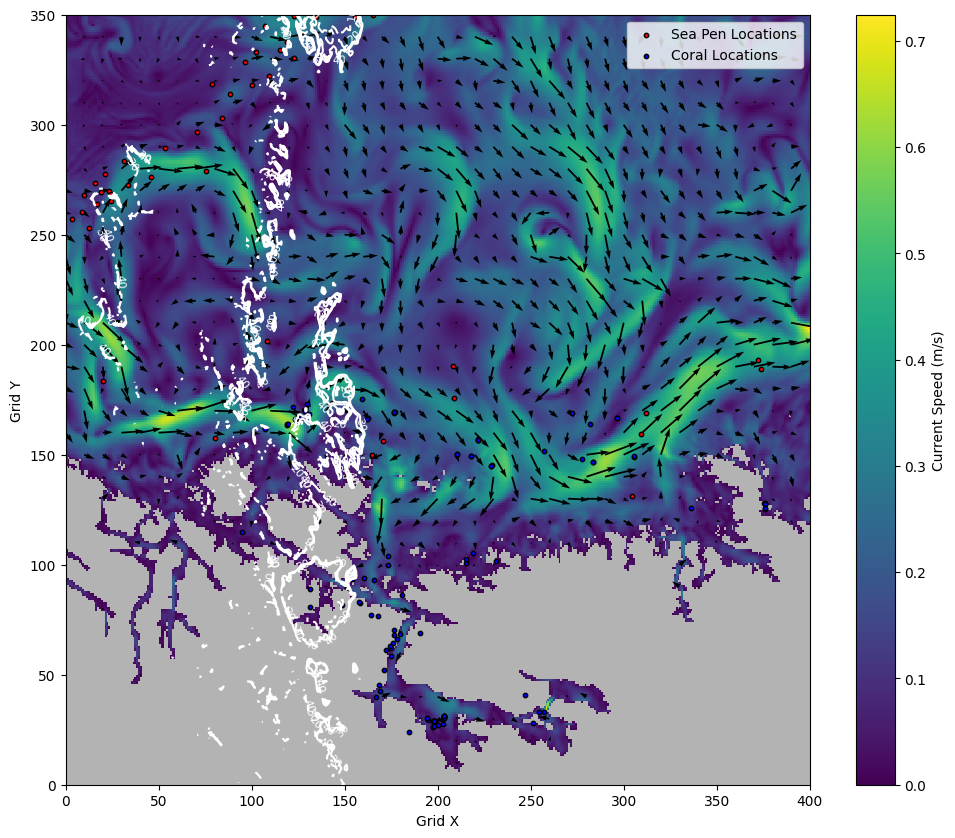

In [15]:
#Plotting
import plot
import importlib

importlib.reload(plot)

cvals = [0, 10, 20, 30, 40]


fig = plt.figure(figsize=(12, 10))


plot.plot(field_u.T, field_v.T, depth, 10, cvals, seapen_x, seapen_y, coral_x, coral_y, fig)



